In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime

from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [ ]:
df.head()

,user_id,screen_name,tweet_id,tweet_text,tweet_creation,tweet_fav,tweet_rt,rp_flag,rp_status,rp_user,...,rt_flag,rt_status_id,rt_user_id,rt_text,rt_creation,rt_fav,rt_rt,Toxicity,Severe Toxicity,NewDateFormat
0,4746709454,just_jusss,911477065328631809,"Having a strict dad, if I ask to go out one we...",1.506159e+09,1.0,0.0,False,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,0.052305,0.002346,2017-09-23 09:27:21
1,4746709454,just_jusss,911399501264384001,Lookin at all these couples like MBN🤧 but then...,1.506140e+09,2.0,0.0,False,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,0.068171,0.003433,2017-09-23 04:19:08
2,4746709454,just_jusss,911343372282900480,Being a senior kinda sucks when most of your f...,1.506127e+09,3.0,0.0,False,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,0.518691,0.023787,2017-09-23 00:36:06
3,773711528398848000,CassandraCohan,923729371235586049,@periwinkledink So pretty,1.509076e+09,1.0,0.0,True,923705106264027136,3.434322e+09,...,False,NaN,NaN,NaN,NaN,NaN,NaN,0.010681,0.002117,2017-10-27 03:53:38
4,773711528398848000,CassandraCohan,923689995763843072,@readyforramos It’s 2017 we go to church and pray,1.509067e+09,3.0,0.0,True,923689936406044673,2.633570e+09,...,False,NaN,NaN,NaN,NaN,NaN,NaN,0.018975,0.001316,2017-10-27 01:17:10


In [ ]:
df.columns

Index(['user_id', 'screen_name', 'tweet_id', 'tweet_text', 'tweet_creation',
       'tweet_fav', 'tweet_rt', 'rp_flag', 'rp_status', 'rp_user', 'qt_flag',
       'qt_status_id', 'qt_user_id', 'qt_text', 'qt_creation', 'qt_fav',
       'qt_rt', 'rt_flag', 'rt_status_id', 'rt_user_id', 'rt_text',
       'rt_creation', 'rt_fav', 'rt_rt', 'Toxicity', 'Severe Toxicity',
       'NewDateFormat'],
      dtype='object')

In [ ]:
df['rt_flag'].unique()

array([False])

In [ ]:
groupDf = df[['user_id', 'Toxicity']]

In [ ]:
groupDf.head()

,user_id,Toxicity
0,4746709454,0.052305
1,4746709454,0.068171
2,4746709454,0.518691
3,773711528398848000,0.010681
4,773711528398848000,0.018975


In [ ]:
groupedDf = groupDf.groupby(['user_id']).agg({'Toxicity': 'mean'}).reset_index()

In [ ]:
groupedDf['Toxicity'] = groupedDf['Toxicity'] * 10
groupedDf['Toxicity'] = (groupedDf['Toxicity'].apply(np.ceil)) / 10

In [ ]:
groupedDf.head()

,user_id,Toxicity
0,12,0.1
1,278,0.2
2,541,0.2
3,586,0.1
4,633,0.1


In [ ]:
groupedDf.head()

,user_id,Toxicity
0,12,0.1
1,278,0.2
2,541,0.2
3,586,0.1
4,633,0.1


In [ ]:
toxicity_counts = groupedDf['Toxicity'].value_counts().sort_index()
toxicity_dict = toxicity_counts.to_dict()

In [ ]:
toxicity_counts

0.1    38413
0.2    15388
0.3     4946
0.4      929
0.5      124
0.6       34
0.7        7
0.8        5
0.9        1
1.0        1
Name: Toxicity, dtype: int64

In [ ]:
toxicity_counts.sum()

59848

In [ ]:
toxicity_range = list(toxicity_dict.keys())
user_counts = list(toxicity_dict.values())

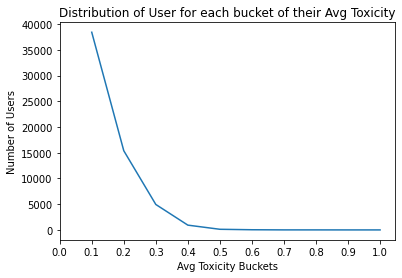

In [ ]:
plt.plot(toxicity_range, user_counts)
plt.xlabel('Avg Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Distribution of User for each bucket of their Avg Toxicity')
plt.xticks([i/10 for i in range(0, 11)])
# plt.yticks(list(toxicity_dict.values()))
plt.show()

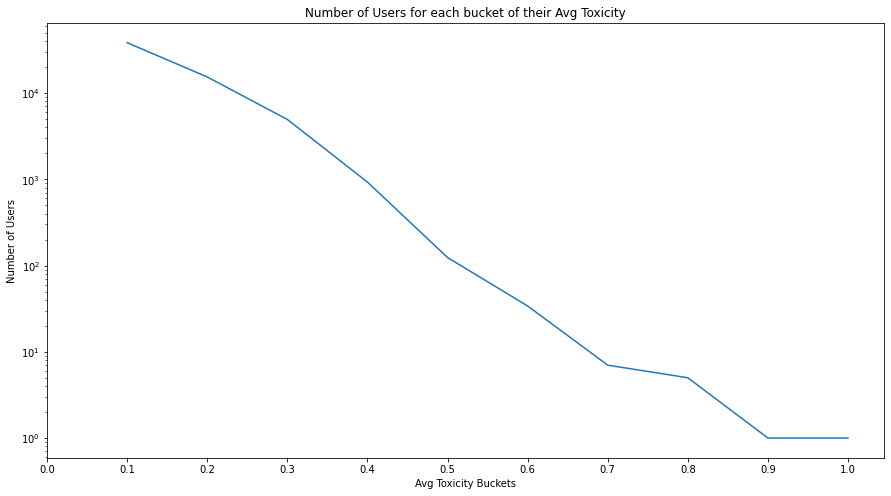

In [ ]:
plt.figure(figsize=(15,8))
plt.semilogy(toxicity_range, user_counts)
plt.xlabel('Avg Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Number of Users for each bucket of their Avg Toxicity')
plt.xticks([i/10 for i in range(0, 11)])
# plt.yticks(list(toxicity_dict.values()))
plt.show()

In [ ]:
# https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

In [ ]:
toxicity_data = groupedDf['Toxicity']

<AxesSubplot:>

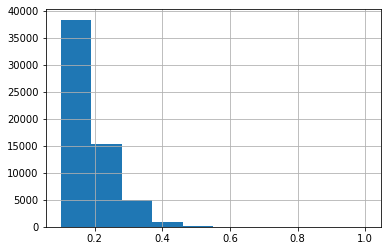

In [ ]:
toxicity_data.hist()

In [ ]:
stat, p = shapiro(toxicity_data)

In [ ]:
# If the p-value is greater than the significance level (e.g., 0.05), then we can accept the null hypothesis that the data is normally distributed.
# the stat value is the degree of departure from normality. The closer the value is to 1, the more likely it is that the sample comes from a normal distribution.
print('Shapiro-Wilk Test')
print(f'Statistics: {stat:.8f}, p-value: {p:.8f}')

Shapiro-Wilk Test
Statistics: 0.66888630, p-value: 0.00000000
